# 標本平均の実装

In [1]:
import numpy as np

# naive implementation
np.random.seed(0)
rewards = []

for n in range(1, 11):
    reward = np.random.rand()
    rewards.append(reward)
    Q = sum(rewards) / n
    print(Q)


print('---')

# incremental implementation
np.random.seed(0)
Q = 0

for n in range(1, 11):
    reward = np.random.rand()
    Q = Q + (reward - Q) / n
    print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571295
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425
---
0.5488135039273248
0.6320014351498722
0.6222554154571294
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


# バンディットアルゴリズムの実装

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#スロットマシンのクラス
class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [12]:
bandit = Bandit()
print("各スロットの勝率={}".format(bandit.rates))

bandit.play(9)

各スロットの勝率=[0.02010755 0.82894003 0.00469548 0.67781654 0.27000797 0.73519402
 0.96218855 0.24875314 0.57615733 0.59204193]


1

In [14]:
bandit = Bandit()
Q=0

for n in range(1, 11):
    reward = bandit.play(0)
    Q = Q + (reward - Q) / n
    print(Q)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1111111111111111
0.09999999999999999


In [15]:
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
    action = np.random.randint(0, 10)
    reward = bandit.play(action)

    ns[action] += 1
    Qs[action] += (reward - Qs[action]) / ns[action]
    print(Qs)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
[1.  0.  0.  1.  0.  0.5 0.  0.  1.  0. ]
[1.  0.  0.  1.  0.  0.5 0.  0.  1.  0. ]
[1.  0.  0.  1.  0.  0.5 0.  0.  1.  0. ]
[1.         0.         0.         1.         0.         0.33333333
 0.         0.         1.         0.        ]


In [17]:
#エージェントクラス実装
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

853


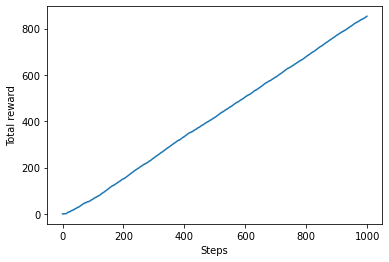

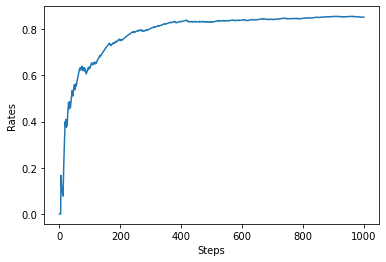

In [50]:
steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []
actions = {str(i):0 for i in range(len(agent.Qs))}#独自に導入した各アクションの回数をカウントするdict

for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward

    actions[str(action)] += 1
    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))

print(total_reward)

plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()


In [51]:
import pandas as pd

arms = len(agent.Qs)
df = pd.DataFrame(np.zeros([2, arms]), index=["Q_est", "action_count"], columns=[str(i) for i in range(arms)])
df.loc["Q_est"] = agent.Qs
df.loc["action_count"] = actions

df

,0,1,2,3,4,5,6,7,8,9
Q_est,0.04,0.666667,0.272727,0.840336,0.555556,0.307692,0.916129,0.5625,0.333333,0.909091
action_count,25.00,12.000000,11.000000,119.000000,9.000000,13.000000,775.000000,16.0000,9.000000,11.000000
